In [216]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [217]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [218]:
# Path to the dataset in your Google Drive
dataset_path = '/content/drive/MyDrive/projeto/output.csv'

# Load the dataset using Pandas
df = pd.read_csv(dataset_path)

X = df.drop('message0418DAA-1', axis=1)
y = df['message0418DAA-1']

df

,amscHprsovDrivF-1a,amscHprsovDrivF-1b,amscHprsovDrivF-2b,amscPrsovDrivF-1a,amscPrsovDrivF-1b,amscPrsovDrivF-2b,basBleedLowPressF-1a,basBleedLowPressF-2b,basBleedLowTempF-1a,basBleedLowTempF-2b,...,bleedOverpressCas-2b,bleedPrecoolDiffPress-1a,bleedPrecoolDiffPress-1b,bleedPrecoolDiffPress-2a,bleedPrecoolDiffPress-2b,bleedPrsovClPosStatus-1a,bleedPrsovClPosStatus-2a,bleedPrsovFbk-1a,message0422DAA-1,message0418DAA-1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.75000,2.75000,2.75000,2.75000,2769.0,4937.0,6908.625,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.15625,2.00000,1.56250,1.56250,8017.0,7770.0,1446.375,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.34375,0.37500,4.75000,4.75000,42588.0,16681.0,5072.125,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.71875,2.68750,2.53125,2.53125,3112.0,3110.0,4821.375,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.68750,2.71875,2.56250,2.56250,2674.0,3840.0,4458502.375,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.78125,2.65625,2.68750,2.68750,2536.0,2547.0,14905.875,0.0,0.0
2650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.34375,0.31250,4.75000,4.75000,95486.0,10909.0,22965.750,0.0,0.0
2651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.90625,0.96875,0.93750,0.93750,26979.0,26980.0,970277.000,0.0,0.0
2652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.87500,2.87500,2.62500,2.62500,2617.0,7707.0,4192752.625,0.0,0.0


In [219]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the features
X_scaled = scaler.fit_transform(X)

# Print out the first few rows of the original and scaled data
print("Original Data (X):")
print(X.head())

print("\nScaled Data (X_scaled):")
print(X_scaled[:5])  # Print the first 5 rows

# Check the range of scaled values
print("\nScaled Data Range:")
print("Min:", X_scaled.min())
print("Max:", X_scaled.max())

Original Data (X):
   amscHprsovDrivF-1a  amscHprsovDrivF-1b  amscHprsovDrivF-2b  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   amscPrsovDrivF-1a  amscPrsovDrivF-1b  amscPrsovDrivF-2b  \
0                0.0                0.0                0.0   
1                0.0                0.0                0.0   
2                0.0                0.0                0.0   
3                0.0                0.0                0.0   
4                0.0                0.0                0.0   

   basBleedLowPressF-1a  basBleedLowPressF-2b  basBleedLowTempF-1a  \
0                   0.0                   0.0                  0.0   
1                   0.0                   0.0                  0.0   
2      

In [220]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [221]:
# Create a kNN classifier
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [222]:
# Train the classifier
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [223]:
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

In [224]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9939759036144579


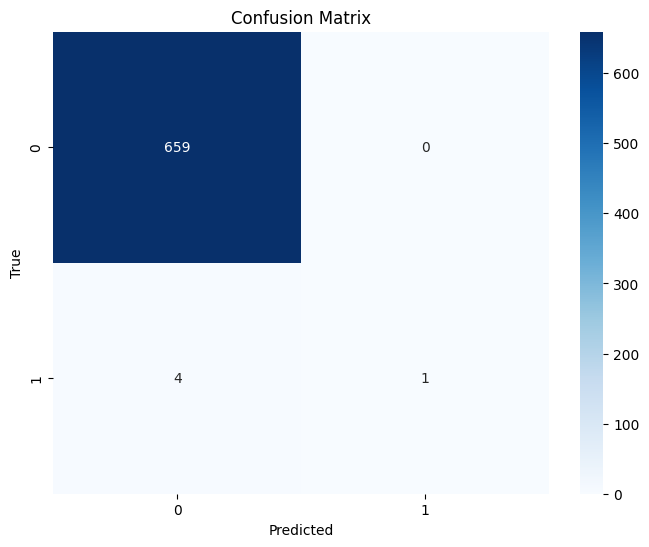

In [225]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [226]:
# Use k-fold cross-validation with k=5
cross_val_scores = cross_val_score(knn_classifier, X_scaled, y, cv=5)

# Print cross-validation scores for each fold
print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Score:", cross_val_scores.mean())

Cross-Validation Scores: [0.99623352 0.99435028 0.99435028 0.99623352 0.99622642]
Mean CV Score: 0.9954788046761184


In [227]:
# Path to the dataset in your Google Drive
dataset_path = '/content/drive/MyDrive/projeto/output.csv'

# Load the dataset
df = pd.read_csv(dataset_path)

# Get the ground truth labels and predictions
y_true = df['message0418DAA-1']
y_pred = df['message0422DAA-1']

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred, pos_label=0)
recall = recall_score(y_true, y_pred, pos_label=0)
f1 = f1_score(y_true, y_pred, pos_label=0)

# Print the results
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Precision: 0.9950998869204674
Recall: 0.9996213555471413
F1 score: 0.9973554967888175


In [234]:
# Calcula a matriz de correlação para o DataFrame df e aplica um estilo de gradiente de cores
matriz_corr = df.corr().style.background_gradient(cmap='coolwarm')
matriz_corr

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,amscHprsovDrivF-1a,amscHprsovDrivF-1b,amscHprsovDrivF-2b,amscPrsovDrivF-1a,amscPrsovDrivF-1b,amscPrsovDrivF-2b,basBleedLowPressF-1a,basBleedLowPressF-2b,basBleedLowTempF-1a,basBleedLowTempF-2b,basBleedOverPressF-1a,basBleedOverPressF-2b,basBleedOverTempF-1a,basBleedOverTempF-2b,bleedFavTmCmd-1a,bleedFavTmCmd-1b,bleedFavTmCmd-2a,bleedFavTmCmd-2b,bleedFavTmFbk-1a,bleedFavTmFbk-1b,bleedFavTmFbk-2b,bleedHprsovCmdStatus-1a,bleedHprsovCmdStatus-1b,bleedHprsovCmdStatus-2a,bleedHprsovCmdStatus-2b,bleedHprsovOpPosStatus-1a,bleedHprsovOpPosStatus-1b,bleedHprsovOpPosStatus-2a,bleedHprsovOpPosStatus-2b,bleedMonPress-1a,bleedMonPress-1b,bleedMonPress-2a,bleedMonPress-2b,bleedOnStatus-1a,bleedOnStatus-1b,bleedOnStatus-2b,bleedOverpressCas-2a,bleedOverpressCas-2b,bleedPrecoolDiffPress-1a,bleedPrecoolDiffPress-1b,bleedPrecoolDiffPress-2a,bleedPrecoolDiffPress-2b,bleedPrsovClPosStatus-1a,bleedPrsovClPosStatus-2a,bleedPrsovFbk-1a,message0422DAA-1,message0418DAA-1
amscHprsovDrivF-1a,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
amscHprsovDrivF-1b,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
amscHprsovDrivF-2b,nan,nan,1.000000,-0.001679,-0.001741,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.015805,-0.018626,-0.083563,-0.083328,-0.018271,-0.018644,0.099483,-0.017272,-0.017391,-0.017730,-0.017730,-0.050668,-0.050668,-0.060999,-0.061001,-0.104634,-0.104623,-0.110199,-0.110199,-0.035939,-0.035939,-0.039301,nan,nan,-0.066239,-0.066479,-0.069665,-0.069665,0.029234,-0.024889,-0.015445,-0.000377,-0.001362
amscPrsovDrivF-1a,nan,nan,-0.001679,1.000000,0.980853,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.048308,-0.055031,0.065399,0.065402,-0.045242,-0.054460,0.048045,-0.067035,-0.074562,0.093992,0.093992,-0.208208,-0.208213,0.106804,0.106801,-0.081998,-0.081734,0.001446,0.001446,-0.124196,-0.124199,0.016659,nan,nan,-0.194209,-0.196553,0.201503,0.201503,0.354640,0.108061,-0.046427,-0.001679,0.416426
amscPrsovDrivF-1b,nan,nan,-0.001741,0.980853,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.045619,-0.050687,0.060015,0.060017,-0.039534,-0.050035,0.042395,-0.060653,-0.076068,0.087735,0.087735,-0.201111,-0.201118,0.107017,0.107015,-0.081064,-0.080785,-0.001825,-0.001825,-0.124048,-0.124051,0.013468,nan,nan,-0.190682,-0.192706,0.195777,0.195777,0.347722,0.108720,-0.043772,-0.001741,0.407759
amscPrsovDrivF-2b,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
basBleedLowPressF-1a,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
basBleedLowPressF-2b,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
basBleedLowTempF-1a,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
basBleedLowTempF-2b,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
